# 12. 의사결정나무 과제 


## boston데이터를 가지고 집값을 예측하는 의사결정나무 모델을 만들고 결과를 해석하세요 

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd 
from sklearn.datasets import load_boston
boston= load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = boston.target

In [6]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2022, test_size=0.3)
dt_reg = DecisionTreeRegressor()#random_state=2022)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_reg_param_grid = {'max_depth':range(2,16,1), 'min_samples_leaf':(1,5,10,15,20)}
model = GridSearchCV(dt_reg, dt_reg_param_grid, cv=5)
model.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(2, 16),
                         'min_samples_leaf': (1, 5, 10, 15, 20)})

In [22]:
model.best_estimator_

DecisionTreeRegressor(max_depth=5)

In [23]:
model.best_score_

0.7888468772257647

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print(rmse)

4.923229426305474


## 해석

이 모델의 R^2값은 0.7884라서, 모델의 78.84% 설명 가능

모델의 예측값과 차이의 평균은 4.92만큼 난다

## titanic데이터를 가지고 생존율을 예측하는 의사결정나무 모델을 만들고 결과를 해석하세요 

In [46]:
df_t = pd.read_csv("../../data/titanic.csv")
df_t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [47]:
df_t['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [48]:
df_t['age'] = df_t['age'].fillna(df_t['age'].mean())
df_t['embarked'] = df_t['embarked'].fillna('S')
df_t = df_t.drop(['deck', 'embark_town','alive'],axis=1)

df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    object 
 8   class       891 non-null    object 
 9   who         891 non-null    object 
 10  adult_male  891 non-null    bool   
 11  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(4)
memory usage: 71.5+ KB


In [49]:
df_t = pd.get_dummies(df_t, columns=['sex', 'embarked', 'class', 'who', 'adult_male'])
df_t

,survived,pclass,age,sibsp,parch,fare,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,adult_male_False,adult_male_True
0,0,3,22.000000,1,0,7.2500,False,0,1,0,0,1,0,0,1,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,False,1,0,1,0,0,1,0,0,0,0,1,1,0
2,1,3,26.000000,0,0,7.9250,True,1,0,0,0,1,0,0,1,0,0,1,1,0
3,1,1,35.000000,1,0,53.1000,False,1,0,0,0,1,1,0,0,0,0,1,1,0
4,0,3,35.000000,0,0,8.0500,True,0,1,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,True,0,1,0,0,1,0,1,0,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,True,1,0,0,0,1,1,0,0,0,0,1,1,0
888,0,3,29.699118,1,2,23.4500,False,1,0,0,0,1,0,0,1,0,0,1,1,0
889,1,1,26.000000,0,0,30.0000,True,0,1,1,0,0,1,0,0,0,1,0,0,1


In [52]:
X = df_t.drop(['survived'], axis=1)
y = df_t['survived']

print(X.shape, y.shape)

(891, 19) (891,)


In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2022)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_clf = DecisionTreeClassifier(random_state=2022)
param_grid = {'max_depth':range(2,10,1), 'min_samples_leaf':(2, 10, 1)}
model = GridSearchCV(dt_clf, param_grid, cv=5)
model.fit(X_train_scaled, y_train)

model = model.best_estimator_
model

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, random_state=2022)

In [56]:
print(f'train score: {model.score(X_train_scaled,y_train)}, test score: {model.score(X_test_scaled, y_test)}')


train score: 0.8603531300160514, test score: 0.7910447761194029


In [57]:
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1])

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, plot_roc_curve, precision_score, f1_score, recall_score

confusion_matrix(y_test, y_pred)

array([[148,  17],
       [ 39,  64]])

In [60]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.7901234567901234
0.6213592233009708
0.6956521739130433


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       165
           1       0.79      0.62      0.70       103

    accuracy                           0.79       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.79      0.79       268



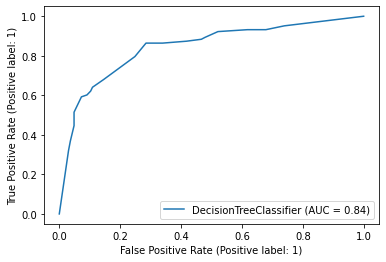

In [62]:
plot_roc_curve(model, X_test_scaled, y_test)

In [63]:
roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])

0.8428361282730216

## 가지치기

1) GridSearchCV 사용 후 max_depth=8, min_samples,leaf=10의 모델을 도출했다

2) 결과 roc_auc_score는 0.8428이 나왔다

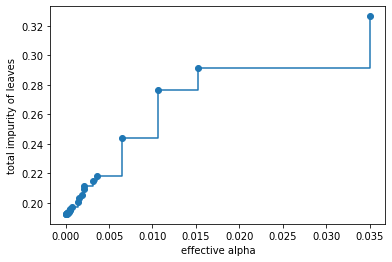

In [65]:
# ccp_alpha
path = model.cost_complexity_pruning_path(X_train_scaled, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
plt.xlabel('effective alpha')
plt.ylabel('total impurity of leaves')
plt.show()

In [66]:
dt_clf_pr = DecisionTreeClassifier(ccp_alpha=0.006, max_depth=8, min_samples_leaf=10, random_state=2022)
dt_clf_pr = dt_clf_pr.fit(X_train_scaled, y_train)
dt_pred_pr = dt_clf_pr.predict(X_test_scaled)

confusion_matrix(y_test, dt_pred_pr)

array([[141,  24],
       [ 30,  73]])

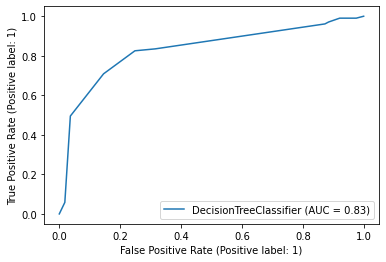

In [67]:
plot_roc_curve(dt_clf_pr, X_test_scaled, y_test)

In [68]:
roc_auc_score(y_test, dt_clf_pr.predict_proba(X_test_scaled)[:,1])

0.8318328920270668

그다지 효과는 없었다